In [1]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [2]:
a = pd.read_csv('accepted.csv')
a.head(3)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,246

In [3]:
a.shape

(2260701, 151)

In [4]:
#1. Remove all obserations with No Funded Amount First, How many:
print(len(a[a.funded_amnt.isnull()]))

33


In [5]:
drop = a[a.funded_amnt.isnull()].index
a.drop(drop, axis=0, inplace=True)
a.shape

(2260668, 151)

In [6]:
#No more NaN funded amounts: 
a[a.funded_amnt.isna()].shape

(0, 151)

In [7]:
#2. How many value types for "loan_status"?
print(a.loan_status.value_counts(dropna=False).sum()) #Total matches

a.loan_status.value_counts(dropna=False)

2260668


Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [8]:
#Create new column and map Charged Off = 0, Fully Paid = 1
a['loan_status_bin'] = a['loan_status'].map({'Charged Off':0, 'Fully Paid':1})

In [9]:
#Quick Check:
a[['loan_status', 'loan_status_bin']].sample(10)

,loan_status,loan_status_bin
1947190,Charged Off,0.0
1183837,Charged Off,0.0
936239,Charged Off,0.0
754602,Current,NaN
686151,Fully Paid,1.0
524624,Current,NaN
675500,Current,NaN
799349,Current,NaN
2218474,Current,NaN
1602001,Current,NaN


In [10]:
#Drop all loans which do not classify as "Fully Paid" or "Charged Off":
drop2 = a[a.loan_status_bin.isnull()].index
a.drop(drop2, axis=0, inplace=True)
a.shape

(1345310, 152)

In [11]:
a.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_bin
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0

In [12]:
#3. Taking all loans with interest rate greater than or equal to 20%: 
a = a[a.int_rate >= 20].reset_index(drop=True)
a.shape

(110144, 152)

In [13]:
#4. Check breakdown by grade type and keep only D:
a.grade.value_counts()

E    55735
F    31483
D    13824
G     9102
Name: grade, dtype: int64

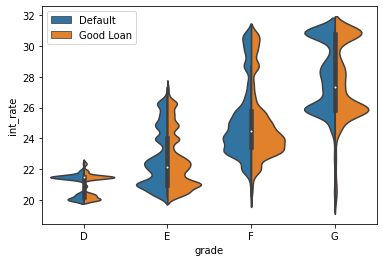

In [14]:
g = sns.violinplot(data=a, y='int_rate', x='grade', split=True, hue='loan_status_bin',
               order=['D', 'E', 'F', 'G'])

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [15]:
a[['grade', 'loan_status_bin']].groupby(['grade']).describe()

loan_status_bin                                             
                count      mean       std  min  25%  50%  75%  max
grade                                                             
D             13824.0  0.669560  0.470389  0.0  0.0  1.0  1.0  1.0
E             55735.0  0.617673  0.485960  0.0  0.0  1.0  1.0  1.0
F             31483.0  0.544643  0.498011  0.0  0.0  1.0  1.0  1.0
G              9102.0  0.500000  0.500027  0.0  0.0  0.5  1.0  1.0

In [16]:
a = a[(a.grade=='D')]
a.shape

(13824, 152)

In [17]:
## Keep verification....see what happens: 

#5. Drop all observations where income is not verified: 

a['verification_status'].value_counts()

Verified           5659
Source Verified    5137
Not Verified       3028
Name: verification_status, dtype: int64

In [18]:
#a = a[a['verification_status']!='Not Verified'].reset_index(drop=True)
a.shape

(13824, 152)

In [19]:
#4. Drop member_id (all NaN), funded_amnt, funded_amnt_inv. Keep loan_amnt (we know that before investment): 
a.drop(['member_id', 'funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)
a.shape

(13824, 149)

In [20]:
#5. Remove all columns related to "hardship" status. We won't know this at get go. 

a.drop(['hardship_flag', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount',
        'hardship_loan_status', 'hardship_dpd', 'hardship_end_date', 'hardship_start_date',
        'hardship_amount', 'hardship_status', 'hardship_reason', 'hardship_type', 
        'hardship_length'], axis=1, inplace=True)
a.shape

(13824, 137)

In [21]:
#6. Remove 'Policy Code' Column. All Policy Codes here are '1'. 
a.policy_code.value_counts()

1.0    13824
Name: policy_code, dtype: int64

In [22]:
a.drop(['policy_code'], axis=1, inplace=True)
a.shape

(13824, 136)

In [23]:
#7. Remove all observations with "Joint Applications". 
a.application_type.value_counts()

Individual    12560
Joint App      1264
Name: application_type, dtype: int64

In [24]:
a = a[a.application_type == 'Individual']
a.shape

(12560, 136)

In [25]:
#8. Remove all info regarding second applicant or "Joint Applications".

In [26]:
a.drop(['sec_app_mths_since_last_major_derog', 'sec_app_collections_12_mths_ex_med',
        'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il',
        'sec_app_revol_util', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc',
        'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_low',
        'dti_joint', 'sec_app_fico_range_high', 'verification_status_joint', 'revol_bal_joint', 
        'annual_inc_joint'], axis=1, inplace=True)

a.shape

(12560, 120)

In [27]:
#9. Remove 'next_pymnt_d' because all loans are "Paid Off" or "Defaulted", so they are all "NaN"
a.next_pymnt_d.isna().sum()

12560

In [28]:
a.drop(['next_pymnt_d'], axis=1, inplace=True)
a.shape

(12560, 119)

In [29]:
#10. Drop 'url'. It will not provide any info. 
a.drop(['url'], axis=1, inplace=True)
a.shape

(12560, 118)

In [30]:
#11. Drop 'zip_code'. It's not even complete. Can always use addr_state if location is a factor. 
a.drop(['zip_code'], axis=1, inplace=True)
a.shape

(12560, 117)

In [31]:
#12. "out_prncp" and "out_prncp_inv" are 0 because there is no more "outstanding" amounts. Drop them. 
print(a.out_prncp.value_counts())
print(a.out_prncp_inv.value_counts())

0.0    12560
Name: out_prncp, dtype: int64
0.0    12560
Name: out_prncp_inv, dtype: int64


In [32]:
a.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)
a.shape

(12560, 115)

In [33]:
#13. Remove 'id' (irrevelvant) but keep 'issue_d' for feature engineering.
a.drop(['id'], axis=1, inplace=True)
a.shape

(12560, 114)

In [34]:
#14. Drop 'pymnt_plan'. They are all 'n'. 
a.pymnt_plan.value_counts()

n    12560
Name: pymnt_plan, dtype: int64

In [35]:
a.drop(['pymnt_plan'], axis=1, inplace=True)
a.shape

(12560, 113)

In [36]:
#15. Drop 'last_fico_range_high' and 'last_fico_range_low'. We only rely on initial fico scores. 
a.drop(['last_fico_range_high', 'last_fico_range_low'], axis=1, inplace=True)
a.shape

(12560, 111)

In [37]:
#16. Taking all loans with interest rate greater than or equal to 20%: 
a = a[a.int_rate >= 20].reset_index(drop=True)
a.shape

(12560, 111)

In [38]:
#Partial Set of Features, Work in Progress......

In [39]:
#16. Let's rearrange order of columns to enhance our view: 
sub = a[['issue_d', 'loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
   'term', 'int_rate', 'installment', 'initial_list_status',
   'grade', 'sub_grade', 'emp_length', 'home_ownership',
   'earliest_cr_line', 'open_acc', 'total_acc',
   'revol_bal', 'revol_util',
   'inq_last_6mths',
   
   'delinq_2yrs', 'mths_since_last_delinq','acc_now_delinq',
   'collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal',
   'pub_rec', 'mths_since_last_record',
   
   
   'purpose', 'title', 'addr_state', 'loan_status', 
   'loan_status_bin', 
   'application_type',
   'verification_status','emp_title',
   'total_pymnt', 'total_pymnt_inv',
   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
   'recoveries', 'collection_recovery_fee',
   'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 
   'desc']]

sub.head(2)

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,mths_since_last_record,purpose,title,addr_state,loan_status,loan_status_bin,application_type,verification_status,emp_title,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,desc
0,Mar-2018,30000.0,57000.0,27.58,680.0,684.0,36 months,21.85,1143.39,w,D,D5,10+ years,OWN,Apr-2000,11.0,26.0,29222.0,53.2,1.0,0.0,68.0,0.0,0.0,0.0,157566.0,0.0,NaN,debt_consolidation,Debt consolidation,FL,Fully Paid,1.0,Individual,Verified,teacher,34389.550341,34389.55,30000.0,4389.55,0.0,0.0,0.0,Dec-2018,26458.65,Dec-2018,NaN
1,Mar-2018,21000.0,85000.0,15.76,665.0,669.0,60 months,20.39,560.94,w,D,D4,10+ years,OWN,Nov-2008,15.0,27.0,14591.0,34.2,0.0,1.0,2.0,0.0,0.0,0.0,128270.0,0.0,NaN,house,Home buying,NY,Fully Paid,1.0,Individual,Source Verified,Machine operator,24217.170915,24217.17,21000.0,3217.17,0.0,0.0,0.0,Feb-2019,183.26,Mar-2019,NaN


In [40]:
sub.shape

(12560, 47)

In [41]:
sub.isna().mean().sort_values()

issue_d                       0.000000
tot_coll_amt                  0.000000
tot_cur_bal                   0.000000
pub_rec                       0.000000
purpose                       0.000000
addr_state                    0.000000
loan_status                   0.000000
loan_status_bin               0.000000
application_type              0.000000
verification_status           0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
last_credit_pull_d            0.000000
acc_now_delinq                0.000000
collections_12_mths_ex_med    0.000000
grade                         0.000000
dti                           0.000000
fico_range_low                0.000000
fico_range_high               0.000000
term                     

In [42]:
#Carve out features from 'sub' which you think are most important:

imp_sub = sub[['issue_d', 'loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
   'term', 'int_rate', 'installment', 'initial_list_status',
   'grade', 'sub_grade', 'emp_length', 'home_ownership',
   'earliest_cr_line', 'open_acc', 'total_acc',
   'revol_bal', 'revol_util',
   'inq_last_6mths', 'verification_status',
   
   'delinq_2yrs', 'mths_since_last_delinq','acc_now_delinq',
   'collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal',
   'pub_rec', 'mths_since_last_record',
   
   
   'purpose', 'title', 'loan_status', 
   'loan_status_bin']] 

In [43]:
imp_sub.shape

(12560, 33)

In [44]:
imp_sub.head(2)

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,mths_since_last_record,purpose,title,loan_status,loan_status_bin
0,Mar-2018,30000.0,57000.0,27.58,680.0,684.0,36 months,21.85,1143.39,w,D,D5,10+ years,OWN,Apr-2000,11.0,26.0,29222.0,53.2,1.0,Verified,0.0,68.0,0.0,0.0,0.0,157566.0,0.0,NaN,debt_consolidation,Debt consolidation,Fully Paid,1.0
1,Mar-2018,21000.0,85000.0,15.76,665.0,669.0,60 months,20.39,560.94,w,D,D4,10+ years,OWN,Nov-2008,15.0,27.0,14591.0,34.2,0.0,Source Verified,1.0,2.0,0.0,0.0,0.0,128270.0,0.0,NaN,house,Home buying,Fully Paid,1.0


In [45]:
imp_sub.isna().sum().sort_values()

issue_d                           0
purpose                           0
pub_rec                           0
tot_cur_bal                       0
tot_coll_amt                      0
collections_12_mths_ex_med        0
acc_now_delinq                    0
delinq_2yrs                       0
verification_status               0
inq_last_6mths                    0
revol_bal                         0
loan_status                       0
open_acc                          0
earliest_cr_line                  0
total_acc                         0
term                              0
loan_amnt                         0
annual_inc                        0
dti                               0
fico_range_low                    0
fico_range_high                   0
home_ownership                    0
loan_status_bin                   0
int_rate                          0
installment                       0
initial_list_status               0
grade                             0
sub_grade                   

In [46]:
#Let's add emp_length to the mix. Impute NaN with "None" string for time being: 

In [47]:
imp_sub['emp_length'].isna().sum()

810

In [48]:
imp_sub['emp_length'].replace(np.nan, "None", inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [49]:
imp_sub['emp_length'].isna().sum()

0

In [50]:
imp_sub.isna().sum().sort_values()

issue_d                           0
purpose                           0
pub_rec                           0
tot_cur_bal                       0
tot_coll_amt                      0
collections_12_mths_ex_med        0
acc_now_delinq                    0
delinq_2yrs                       0
verification_status               0
inq_last_6mths                    0
revol_bal                         0
loan_status                       0
open_acc                          0
earliest_cr_line                  0
total_acc                         0
emp_length                        0
loan_amnt                         0
annual_inc                        0
dti                               0
fico_range_low                    0
fico_range_high                   0
home_ownership                    0
term                              0
int_rate                          0
installment                       0
initial_list_status               0
grade                             0
sub_grade                   

In [51]:
#For the time being, drop all other features with NAs....we don't know which ones are important.
#We also don't know what is the best way to "impute".
No_NA = imp_sub.dropna(axis=1)
No_NA

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin
0,Mar-2018,30000.0,57000.0,27.58,680.0,684.0,36 months,21.85,1143.39,w,D,D5,10+ years,OWN,Apr-2000,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0
1,Mar-2018,21000.0,85000.0,15.76,665.0,669.0,60 months,20.39,560.94,w,D,D4,10+ years,OWN,Nov-2008,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0
2,Mar-2018,14400.0,62400.0,34.17,705.0,709.0,36 months,20.39,538.03,w,D,D4,4 years,RENT,Jan-2007,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0
3,Mar-2018,15000.0,79500.0,16.05,680.0,684.0,60 months,20.39,400.68,w,D,D4,10+ years,MORTGAGE,Dec-2000,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,debt_consolidation,Charged Off,0.0
4,Mar-2018,30000.0,63000.0,24.04,695.0,699.0,36 months,21.85,1143.39,w,D,D5,10+ years,MORTGAGE,May-2002,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,other,Charged Off,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,Oct-2016,40000.0,93400.0,14.09,705.0,709.0,60 months,21.49,1093.19,f,D,D5,10+ years,RENT,Jun-1983,8.0,14.0,48414.0,0.0,Verified,0.0,0.0,0.0,0.0,48414.0,0.0,debt_consolidation,Fully Paid,1.0
12556,Oct-2016,35000.0,72000.0,16.63,675.0,679.0,60 months,21.49,956.55,f,D,D5,< 1 year,RENT,Oct-2006,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,118.0,45137.0,0.0,major_purchase,Charged Off,0.0
12557,Oct-2016,27450.0,80000.0,15.17,705.0,709.0,36 months,21.49,1041.10,f,D,D5,6 years,MORTGAGE,Jun-2007,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,336.0,169079.0,0.0,debt_consolidation,Fully Paid,1.0
12558,Oct-2016,20000.0,75000.0,25.23,670.0,674.0,60 months,21.49,546.60,f,D,D5,10+ years,MORTGAGE,Jul-1998,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,188888.0,0.0,debt_consolidation,Fully Paid,1.0


In [52]:
#We start with 24 features (includes target as well)
No_NA.shape

(12560, 29)

In [53]:
#Cross check that dataframe in use has no more Null values:
No_NA.isna().sum().sum()

0

In [54]:
data = No_NA.copy()

In [55]:
#Data Types of Remaining Features: 
data.dtypes

issue_d                        object
loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
term                           object
int_rate                      float64
installment                   float64
initial_list_status            object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
earliest_cr_line               object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
verification_status            object
delinq_2yrs                   float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
pub_rec                       float64
purpose     

In [56]:
#Return unique values of categorical columns:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'issue_d': ['Mar-2018',
  'Feb-2018',
  'Jan-2018',
  'Sep-2017',
  'Aug-2017',
  'Jul-2017',
  'Jun-2016',
  'Sep-2018',
  'Aug-2018',
  'Jul-2018',
  'Jun-2017',
  'May-2017',
  'Apr-2017',
  'Dec-2018',
  'Nov-2018',
  'Oct-2018',
  'Jun-2018',
  'May-2018',
  'Apr-2018',
  'Mar-2017',
  'Feb-2017',
  'Jan-2017',
  'Dec-2013',
  'Nov-2013',
  'Oct-2013',
  'Sep-2013',
  'Aug-2013',
  'Jul-2013',
  'Jun-2013',
  'Sep-2016',
  'Aug-2016',
  'Jul-2016',
  'Dec-2017',
  'Nov-2017',
  'Oct-2017',
  'Dec-2016',
  'Nov-2016',
  'Oct-2016'],
 'term': [' 36 months', ' 60 months'],
 'initial_list_status': ['w', 'f'],
 'grade': ['D'],
 'sub_grade': ['D5', 'D4'],
 'emp_length': ['10+ years',
  '4 years',
  '5 years',
  '1 year',
  '3 years',
  '2 years',
  '6 years',
  '< 1 year',
  'None',
  '9 years',
  '8 years',
  '7 years'],
 'home_ownership': ['OWN', 'RENT', 'MORTGAGE', 'ANY'],
 'earliest_cr_line': ['Apr-2000',
  'Nov-2008',
  'Jan-2007',
  'Dec-2000',
  'May-2002',
  'May-2003',
  'Sep-

In [57]:
#A. Working with Date Columns First: 

In [58]:
date_columns = ['issue_d', 'earliest_cr_line']

In [59]:
data[date_columns]

,issue_d,earliest_cr_line
0,Mar-2018,Apr-2000
1,Mar-2018,Nov-2008
2,Mar-2018,Jan-2007
3,Mar-2018,Dec-2000
4,Mar-2018,May-2002
...,...,...
12555,Oct-2016,Jun-1983
12556,Oct-2016,Oct-2006
12557,Oct-2016,Jun-2007
12558,Oct-2016,Jul-1998


In [60]:
data.loc[0, 'earliest_cr_line'][0:3]

'Apr'

In [61]:
data.loc[0, 'earliest_cr_line'][-4:]

'2000'

In [62]:
for column in date_columns:
    data[column + '_month'] = data[column].apply(lambda x: x[0:3])
    data[column + '_year'] = data[column].apply(lambda x: x[-4:])

In [63]:
data

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,Mar-2018,30000.0,57000.0,27.58,680.0,684.0,36 months,21.85,1143.39,w,D,D5,10+ years,OWN,Apr-2000,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,Mar,2018,Apr,2000
1,Mar-2018,21000.0,85000.0,15.76,665.0,669.0,60 months,20.39,560.94,w,D,D4,10+ years,OWN,Nov-2008,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,Mar,2018,Nov,2008
2,Mar-2018,14400.0,62400.0,34.17,705.0,709.0,36 months,20.39,538.03,w,D,D4,4 years,RENT,Jan-2007,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0,Mar,2018,Jan,2007
3,Mar-2018,15000.0,79500.0,16.05,680.0,684.0,60 months,20.39,400.68,w,D,D4,10+ years,MORTGAGE,Dec-2000,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,debt_consolidation,Charged Off,0.0,Mar,2018,Dec,2000
4,Mar-2018,30000.0,63000.0,24.04,695.0,699.0,36 months,21.85,1143.39,w,D,D5,10+ years,MORTGAGE,May-2002,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,other,Charged Off,0.0,Mar,2018,May,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,Oct-2016,40000.0,93400.0,14.09,705.0,709.0,60 months,21.49,1093.19,f,D,D5,10+ years,RENT,Jun-1983,8.0,14.0,48414.0,0.0,Verified,0.0,0.0,0.0,0.0,48414.0,0.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Jun,1983
12556,Oct-2016,35000.0,72000.0,16.63,675.0,679.0,60 months,21.49,956.55,f,D,D5,< 1 year,RENT,Oct-2006,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,118.0,45137.0,0.0,major_purchase,Charged Off,0.0,Oct,2016,Oct,2006
12557,Oct-2016,27450.0,80000.0,15.17,705.0,709.0,36 months,21.49,1041.10,f,D,D5,6 years,MORTGAGE,Jun-2007,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,336.0,169079.0,0.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Jun,2007
12558,Oct-2016,20000.0,75000.0,25.23,670.0,674.0,60 months,21.49,546.60,f,D,D5,10+ years,MORTGAGE,Jul-1998,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,188888.0,0.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Jul,1998


In [64]:
data = data.drop(date_columns, axis=1)
data.shape

(12560, 31)

In [65]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [66]:
for column in date_columns: 
    data[column + '_month'] = data[column + '_month'].apply(lambda x: month_ordering.index(x))

In [67]:
data

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,30000.0,57000.0,27.58,680.0,684.0,36 months,21.85,1143.39,w,D,D5,10+ years,OWN,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,2,2018,3,2000
1,21000.0,85000.0,15.76,665.0,669.0,60 months,20.39,560.94,w,D,D4,10+ years,OWN,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,2,2018,10,2008
2,14400.0,62400.0,34.17,705.0,709.0,36 months,20.39,538.03,w,D,D4,4 years,RENT,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0,2,2018,0,2007
3,15000.0,79500.0,16.05,680.0,684.0,60 months,20.39,400.68,w,D,D4,10+ years,MORTGAGE,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,debt_consolidation,Charged Off,0.0,2,2018,11,2000
4,30000.0,63000.0,24.04,695.0,699.0,36 months,21.85,1143.39,w,D,D5,10+ years,MORTGAGE,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,other,Charged Off,0.0,2,2018,4,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,40000.0,93400.0,14.09,705.0,709.0,60 months,21.49,1093.19,f,D,D5,10+ years,RENT,8.0,14.0,48414.0,0.0,Verified,0.0,0.0,0.0,0.0,48414.0,0.0,debt_consolidation,Fully Paid,1.0,9,2016,5,1983
12556,35000.0,72000.0,16.63,675.0,679.0,60 months,21.49,956.55,f,D,D5,< 1 year,RENT,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,118.0,45137.0,0.0,major_purchase,Charged Off,0.0,9,2016,9,2006
12557,27450.0,80000.0,15.17,705.0,709.0,36 months,21.49,1041.10,f,D,D5,6 years,MORTGAGE,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,336.0,169079.0,0.0,debt_consolidation,Fully Paid,1.0,9,2016,5,2007
12558,20000.0,75000.0,25.23,670.0,674.0,60 months,21.49,546.60,f,D,D5,10+ years,MORTGAGE,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,188888.0,0.0,debt_consolidation,Fully Paid,1.0,9,2016,6,1998


In [68]:
for column in data.columns:
    try:
        data[column] = data[column].astype(np.float)
    except:
        pass

In [69]:
#Create new column of total months borrower has credit line upto loan issuance date:
data = data.assign(months_cr_line=(data['issue_d_year'] - data['earliest_cr_line_year'])*12+(data['issue_d_month']-data['earliest_cr_line_month']))            

In [70]:
data.drop(['issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year'], axis=1, inplace=True)
data.shape

(12560, 28)

In [71]:
data.head(2)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line
0,30000.0,57000.0,27.58,680.0,684.0,36 months,21.85,1143.39,w,D,D5,10+ years,OWN,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,215.0
1,21000.0,85000.0,15.76,665.0,669.0,60 months,20.39,560.94,w,D,D4,10+ years,OWN,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,112.0


In [72]:
data.dtypes

loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
term                           object
int_rate                      float64
installment                   float64
initial_list_status            object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
verification_status            object
delinq_2yrs                   float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
pub_rec                       float64
purpose                        object
loan_status                    object
loan_status_

In [73]:
#Return unique values of categorical columns:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'term': [' 36 months', ' 60 months'],
 'initial_list_status': ['w', 'f'],
 'grade': ['D'],
 'sub_grade': ['D5', 'D4'],
 'emp_length': ['10+ years',
  '4 years',
  '5 years',
  '1 year',
  '3 years',
  '2 years',
  '6 years',
  '< 1 year',
  'None',
  '9 years',
  '8 years',
  '7 years'],
 'home_ownership': ['OWN', 'RENT', 'MORTGAGE', 'ANY'],
 'verification_status': ['Verified', 'Source Verified', 'Not Verified'],
 'purpose': ['debt_consolidation',
  'house',
  'car',
  'other',
  'small_business',
  'moving',
  'credit_card',
  'home_improvement',
  'vacation',
  'medical',
  'major_purchase',
  'renewable_energy',
  'wedding'],
 'loan_status': ['Fully Paid', 'Charged Off']}

In [74]:
#Encoding Functions

def binary_temp(df, column, positive_value):
    temp_df = df.assign(new_be=df[column].apply(lambda x: 1 if x == positive_value else 0))
    return temp_df

def binary_encode(temp_df, column):
    new_df = temp_df.drop(column, axis=1)
    new_df = new_df.rename(columns={'new_be':column})
    return new_df
    
    #df[column + '_be'] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    #df_new = pd.concat([df, df[column].apply(lambda x: 1 if x == positive_value else 0)], axis=1)
    #df_new = df_new.drop(column, axis=1)
    #return df_new

def ordinal_temp(df, column, ordering):
    temp_df = df.assign(new_oe=df[column].apply(lambda x: ordering.index(x)))
    return temp_df

def ordinal_encode(temp_df, column):
    new_df = temp_df.drop(column, axis=1)
    new_df = new_df.rename(columns={'new_oe':column})
    return new_df

def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

In [75]:
#Check Binary Encoding:
temp = binary_temp(data, 'term', ' 60 months')

In [76]:
temp[['term', 'new_be']].sample(10)

,term,new_be
3036,36 months,0
8097,36 months,0
7768,36 months,0
10984,36 months,0
3895,36 months,0
5262,36 months,0
2561,36 months,0
7093,60 months,1
6472,36 months,0
508,36 months,0


In [77]:
#If ok, complete binary encoding:
new_df = binary_encode(temp, 'term')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,w,D,D5,10+ years,OWN,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,215.0,0
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,w,D,D4,10+ years,OWN,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,112.0,1
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,w,D,D4,4 years,RENT,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0,134.0,0
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,w,D,D4,10+ years,MORTGAGE,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,debt_consolidation,Charged Off,0.0,207.0,1
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,w,D,D5,10+ years,MORTGAGE,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,other,Charged Off,0.0,190.0,0


In [78]:
temp = binary_temp(new_df, 'initial_list_status', 'w')

In [79]:
temp[['initial_list_status', 'new_be']].sample(10)

,initial_list_status,new_be
11757,w,1
10617,w,1
5036,f,0
10394,w,1
4495,f,0
10111,f,0
5659,w,1
673,w,1
11466,w,1
2055,f,0


In [80]:
new_df = binary_encode(temp, 'initial_list_status')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,D,D5,10+ years,OWN,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,215.0,0,1
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,D,D4,10+ years,OWN,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,112.0,1,1
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,D,D4,4 years,RENT,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0,134.0,0,1
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,D,D4,10+ years,MORTGAGE,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,debt_consolidation,Charged Off,0.0,207.0,1,1
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,D,D5,10+ years,MORTGAGE,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,other,Charged Off,0.0,190.0,0,1


In [81]:
grade_ordering = sorted(new_df['grade'].unique())
grade_ordering

['D']

In [82]:
temp_df = ordinal_temp(new_df, 'grade', grade_ordering)
temp_df[['grade', 'new_oe']]

,grade,new_oe
0,D,0
1,D,0
2,D,0
3,D,0
4,D,0
...,...,...
12555,D,0
12556,D,0
12557,D,0
12558,D,0


In [83]:
#If ok, complete ordinal encoding:
new_df = ordinal_encode(temp_df, 'grade')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,D5,10+ years,OWN,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,215.0,0,1,0
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,D4,10+ years,OWN,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,112.0,1,1,0
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,D4,4 years,RENT,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0,134.0,0,1,0
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,D4,10+ years,MORTGAGE,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,debt_consolidation,Charged Off,0.0,207.0,1,1,0
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,D5,10+ years,MORTGAGE,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,other,Charged Off,0.0,190.0,0,1,0


In [84]:
sub_grade_ordering = sorted(new_df['sub_grade'].unique())
sub_grade_ordering

['D4', 'D5']

In [85]:
temp_df = ordinal_temp(new_df, 'sub_grade', sub_grade_ordering)
temp_df[['sub_grade', 'new_oe']]

,sub_grade,new_oe
0,D5,1
1,D4,0
2,D4,0
3,D4,0
4,D5,1
...,...,...
12555,D5,1
12556,D5,1
12557,D5,1
12558,D5,1


In [86]:
#If ok, complete ordinal encoding:
new_df = ordinal_encode(temp_df, 'sub_grade')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,emp_length,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,10+ years,OWN,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,215.0,0,1,0,1
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,10+ years,OWN,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,112.0,1,1,0,0
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,4 years,RENT,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0,134.0,0,1,0,0
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,10+ years,MORTGAGE,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,debt_consolidation,Charged Off,0.0,207.0,1,1,0,0
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,10+ years,MORTGAGE,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,other,Charged Off,0.0,190.0,0,1,0,1


In [87]:
emp_ordering = [
    'None',
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
    ]

In [88]:
temp_df = ordinal_temp(new_df, 'emp_length', emp_ordering)
temp_df[['emp_length', 'new_oe']]

,emp_length,new_oe
0,10+ years,11
1,10+ years,11
2,4 years,5
3,10+ years,11
4,10+ years,11
...,...,...
12555,10+ years,11
12556,< 1 year,1
12557,6 years,7
12558,10+ years,11


In [89]:
new_df = ordinal_encode(temp_df, 'emp_length')
new_df.head(3)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,home_ownership,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,OWN,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,215.0,0,1,0,1,11
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,OWN,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,112.0,1,1,0,0,11
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,RENT,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0,134.0,0,1,0,0,5


In [90]:
#Dummify nominal features:
numerical_df = onehot_encode(new_df, 'home_ownership')
numerical_df

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,debt_consolidation,Fully Paid,1.0,215.0,0,1,0,1,11,0,0,1,0
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,house,Fully Paid,1.0,112.0,1,1,0,0,11,0,0,1,0
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,car,Charged Off,0.0,134.0,0,1,0,0,5,0,0,0,1
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,debt_consolidation,Charged Off,0.0,207.0,1,1,0,0,11,0,1,0,0
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,other,Charged Off,0.0,190.0,0,1,0,1,11,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,40000.0,93400.0,14.09,705.0,709.0,21.49,1093.19,8.0,14.0,48414.0,0.0,Verified,0.0,0.0,0.0,0.0,48414.0,0.0,debt_consolidation,Fully Paid,1.0,400.0,1,0,0,1,11,0,0,0,1
12556,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,118.0,45137.0,0.0,major_purchase,Charged Off,0.0,120.0,1,0,0,1,1,0,0,0,1
12557,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,336.0,169079.0,0.0,debt_consolidation,Fully Paid,1.0,112.0,0,0,0,1,7,0,1,0,0
12558,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,188888.0,0.0,debt_consolidation,Fully Paid,1.0,219.0,1,0,0,1,11,0,1,0,0


In [91]:
numerical_df2 = onehot_encode(numerical_df, 'purpose')
numerical_df2

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,verification_status,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,11.0,26.0,29222.0,1.0,Verified,0.0,0.0,0.0,0.0,157566.0,0.0,Fully Paid,1.0,215.0,0,1,0,1,11,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,15.0,27.0,14591.0,0.0,Source Verified,1.0,0.0,0.0,0.0,128270.0,0.0,Fully Paid,1.0,112.0,1,1,0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,9.0,16.0,22969.0,0.0,Verified,0.0,0.0,0.0,0.0,49495.0,0.0,Charged Off,0.0,134.0,0,1,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,14.0,37.0,6704.0,0.0,Source Verified,2.0,0.0,0.0,0.0,356034.0,0.0,Charged Off,0.0,207.0,1,1,0,0,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,16.0,41.0,40838.0,3.0,Source Verified,1.0,0.0,0.0,0.0,48418.0,0.0,Charged Off,0.0,190.0,0,1,0,1,11,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,40000.0,93400.0,14.09,705.0,709.0,21.49,1093.19,8.0,14.0,48414.0,0.0,Verified,0.0,0.0,0.0,0.0,48414.0,0.0,Fully Paid,1.0,400.0,1,0,0,1,11,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
12556,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,Verified,0.0,0.0,0.0,118.0,45137.0,0.0,Charged Off,0.0,120.0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
12557,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,Verified,0.0,0.0,0.0,336.0,169079.0,0.0,Fully Paid,1.0,112.0,0,0,0,1,7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12558,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,Source Verified,1.0,0.0,0.0,0.0,188888.0,0.0,Fully Paid,1.0,219.0,1,0,0,1,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
numerical_df3 = onehot_encode(numerical_df2, 'verification_status')
numerical_df3

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,11.0,26.0,29222.0,1.0,0.0,0.0,0.0,0.0,157566.0,0.0,Fully Paid,1.0,215.0,0,1,0,1,11,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,15.0,27.0,14591.0,0.0,1.0,0.0,0.0,0.0,128270.0,0.0,Fully Paid,1.0,112.0,1,1,0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,9.0,16.0,22969.0,0.0,0.0,0.0,0.0,0.0,49495.0,0.0,Charged Off,0.0,134.0,0,1,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,14.0,37.0,6704.0,0.0,2.0,0.0,0.0,0.0,356034.0,0.0,Charged Off,0.0,207.0,1,1,0,0,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,16.0,41.0,40838.0,3.0,1.0,0.0,0.0,0.0,48418.0,0.0,Charged Off,0.0,190.0,0,1,0,1,11,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,40000.0,93400.0,14.09,705.0,709.0,21.49,1093.19,8.0,14.0,48414.0,0.0,0.0,0.0,0.0,0.0,48414.0,0.0,Fully Paid,1.0,400.0,1,0,0,1,11,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
12556,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,0.0,0.0,0.0,118.0,45137.0,0.0,Charged Off,0.0,120.0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12557,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,0.0,0.0,0.0,336.0,169079.0,0.0,Fully Paid,1.0,112.0,0,0,0,1,7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
12558,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,1.0,0.0,0.0,0.0,188888.0,0.0,Fully Paid,1.0,219.0,1,0,0,1,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [93]:
numerical_df4 = numerical_df3.drop('loan_status', axis=1)
numerical_df4

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,loan_status_bin,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,11.0,26.0,29222.0,1.0,0.0,0.0,0.0,0.0,157566.0,0.0,1.0,215.0,0,1,0,1,11,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,15.0,27.0,14591.0,0.0,1.0,0.0,0.0,0.0,128270.0,0.0,1.0,112.0,1,1,0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,9.0,16.0,22969.0,0.0,0.0,0.0,0.0,0.0,49495.0,0.0,0.0,134.0,0,1,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,14.0,37.0,6704.0,0.0,2.0,0.0,0.0,0.0,356034.0,0.0,0.0,207.0,1,1,0,0,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,16.0,41.0,40838.0,3.0,1.0,0.0,0.0,0.0,48418.0,0.0,0.0,190.0,0,1,0,1,11,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,40000.0,93400.0,14.09,705.0,709.0,21.49,1093.19,8.0,14.0,48414.0,0.0,0.0,0.0,0.0,0.0,48414.0,0.0,1.0,400.0,1,0,0,1,11,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
12556,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,0.0,0.0,0.0,118.0,45137.0,0.0,0.0,120.0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12557,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,0.0,0.0,0.0,336.0,169079.0,0.0,1.0,112.0,0,0,0,1,7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
12558,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,1.0,0.0,0.0,0.0,188888.0,0.0,1.0,219.0,1,0,0,1,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [94]:
numerical_df4.dtypes

loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
int_rate                      float64
installment                   float64
open_acc                      float64
total_acc                     float64
revol_bal                     float64
inq_last_6mths                float64
delinq_2yrs                   float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
pub_rec                       float64
loan_status_bin               float64
months_cr_line                float64
term                            int64
initial_list_status             int64
grade                           int64
sub_grade                       int64
emp_length                      int64
ANY                             uint8
MORTGAGE                        uint8
OWN         

In [95]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [96]:
X = numerical_df4.drop('loan_status_bin', axis=1)
y = numerical_df4['loan_status_bin']

In [97]:
X

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,30000.0,57000.0,27.58,680.0,684.0,21.85,1143.39,11.0,26.0,29222.0,1.0,0.0,0.0,0.0,0.0,157566.0,0.0,215.0,0,1,0,1,11,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,21000.0,85000.0,15.76,665.0,669.0,20.39,560.94,15.0,27.0,14591.0,0.0,1.0,0.0,0.0,0.0,128270.0,0.0,112.0,1,1,0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,14400.0,62400.0,34.17,705.0,709.0,20.39,538.03,9.0,16.0,22969.0,0.0,0.0,0.0,0.0,0.0,49495.0,0.0,134.0,0,1,0,0,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,15000.0,79500.0,16.05,680.0,684.0,20.39,400.68,14.0,37.0,6704.0,0.0,2.0,0.0,0.0,0.0,356034.0,0.0,207.0,1,1,0,0,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,30000.0,63000.0,24.04,695.0,699.0,21.85,1143.39,16.0,41.0,40838.0,3.0,1.0,0.0,0.0,0.0,48418.0,0.0,190.0,0,1,0,1,11,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,40000.0,93400.0,14.09,705.0,709.0,21.49,1093.19,8.0,14.0,48414.0,0.0,0.0,0.0,0.0,0.0,48414.0,0.0,400.0,1,0,0,1,11,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
12556,35000.0,72000.0,16.63,675.0,679.0,21.49,956.55,5.0,16.0,16267.0,0.0,0.0,0.0,0.0,118.0,45137.0,0.0,120.0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12557,27450.0,80000.0,15.17,705.0,709.0,21.49,1041.10,12.0,21.0,6220.0,0.0,0.0,0.0,0.0,336.0,169079.0,0.0,112.0,0,0,0,1,7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
12558,20000.0,75000.0,25.23,670.0,674.0,21.49,546.60,9.0,21.0,19185.0,1.0,1.0,0.0,0.0,0.0,188888.0,0.0,219.0,1,0,0,1,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
y

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
12555    1.0
12556    0.0
12557    1.0
12558    1.0
12559    1.0
Name: loan_status_bin, Length: 12560, dtype: float64

In [99]:
X_scaled = sc.fit_transform(X)

In [100]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,1.511139,-0.223515,0.946930,-0.175524,-0.175524,1.241699,2.175892,-0.088824,0.195374,0.650273,0.162822,-0.392640,-0.060009,-0.142227,-0.013729,0.182902,-0.405876,0.390609,-0.848851,0.698931,0.0,0.655895,1.151668,-0.019956,-0.873672,2.604210,-0.883202,-0.104626,-0.392277,0.812980,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790
1,0.564527,0.110293,-0.431794,-0.847996,-0.847996,-0.799780,0.213470,0.612170,0.277261,-0.042050,-0.815670,0.687894,-0.060009,-0.142227,-0.013729,-0.011647,-0.405876,-0.805105,1.178063,0.698931,0.0,-1.524634,1.151668,-0.019956,-0.873672,2.604210,-0.883202,-0.104626,-0.392277,-1.230043,-0.245324,9.453027,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,1.291872,-0.836967
2,-0.129656,-0.159138,1.715609,0.945262,0.945262,-0.799780,0.136280,-0.439322,-0.623493,0.354388,-0.815670,-0.392640,-0.060009,-0.142227,-0.013729,-0.534775,-0.405876,-0.549710,-0.848851,0.698931,0.0,-1.524634,-0.361745,-0.019956,-0.873672,-0.383994,1.132244,9.557873,-0.392277,-1.230043,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790
3,-0.066548,0.044724,-0.397967,-0.175524,-0.175524,-0.799780,-0.326487,0.436922,1.096127,-0.415254,-0.815670,1.768427,-0.060009,-0.142227,-0.013729,1.500886,-0.405876,0.297738,1.178063,0.698931,0.0,-1.524634,1.151668,-0.019956,1.144595,-0.383994,-0.883202,-0.104626,-0.392277,0.812980,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,1.291872,-0.836967
4,1.511139,-0.151985,0.534013,0.496947,0.496947,1.241699,2.175892,0.787419,1.423674,1.199929,2.119807,0.687894,-0.060009,-0.142227,-0.013729,-0.541927,-0.405876,0.100387,-0.848851,0.698931,0.0,0.655895,1.151668,-0.019956,1.144595,-0.383994,-0.883202,-0.104626,-0.392277,-1.230043,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,2.950650,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,1.291872,-0.836967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,2.562931,0.210435,-0.626588,0.945262,0.945262,0.738321,2.006755,-0.614570,-0.787266,1.558417,-0.815670,-0.392640,-0.060009,-0.142227,-0.013729,-0.541954,-0.405876,2.538252,1.178063,-1.430757,0.0,0.655895,1.151668,-0.019956,-0.873672,-0.383994,1.132244,-0.104626,-0.392277,0.812980,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790
12556,2.037035,-0.044689,-0.330314,-0.399682,-0.399682,0.738321,1.546380,-1.140316,-0.623493,0.037257,-0.815670,-0.392640,-0.060009,-0.142227,-0.011603,-0.563716,-0.405876,-0.712234,1.178063,-1.430757,0.0,0.655895,-1.370687,-0.019956,-0.873672,-0.383994,1.132244,-0.104626,-0.392277,-1.230043,-0.245324,-0.105786,6.204583,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790
12557,1.242932,0.050684,-0.500613,0.945262,0.945262,0.738321,1.831251,0.086424,-0.214059,-0.438156,-0.815670,-0.392640,-0.060009,-0.142227,-0.007675,0.259357,-0.405876,-0.805105,-0.848851,-1.430757,0.0,0.655895,0.142726,-0.019956,1.144595,-0.383994,-0.883202,-0.104626,-0.392277,0.812980,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790
12558,0.459348,-0.008924,0.

In [101]:
scaled = pd.concat([X,y], axis=1)
scaled

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,inq_last_6mths,delinq_2yrs,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,months_cr_line,term,initial_list_status,grade,sub_grade,emp_length,ANY,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified,loan_status_bin
0,1.511139,-0.223515,0.946930,-0.175524,-0.175524,1.241699,2.175892,-0.088824,0.195374,0.650273,0.162822,-0.392640,-0.060009,-0.142227,-0.013729,0.182902,-0.405876,0.390609,-0.848851,0.698931,0.0,0.655895,1.151668,-0.019956,-0.873672,2.604210,-0.883202,-0.104626,-0.392277,0.812980,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790,1.0
1,0.564527,0.110293,-0.431794,-0.847996,-0.847996,-0.799780,0.213470,0.612170,0.277261,-0.042050,-0.815670,0.687894,-0.060009,-0.142227,-0.013729,-0.011647,-0.405876,-0.805105,1.178063,0.698931,0.0,-1.524634,1.151668,-0.019956,-0.873672,2.604210,-0.883202,-0.104626,-0.392277,-1.230043,-0.245324,9.453027,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,1.291872,-0.836967,1.0
2,-0.129656,-0.159138,1.715609,0.945262,0.945262,-0.799780,0.136280,-0.439322,-0.623493,0.354388,-0.815670,-0.392640,-0.060009,-0.142227,-0.013729,-0.534775,-0.405876,-0.549710,-0.848851,0.698931,0.0,-1.524634,-0.361745,-0.019956,-0.873672,-0.383994,1.132244,9.557873,-0.392277,-1.230043,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790,0.0
3,-0.066548,0.044724,-0.397967,-0.175524,-0.175524,-0.799780,-0.326487,0.436922,1.096127,-0.415254,-0.815670,1.768427,-0.060009,-0.142227,-0.013729,1.500886,-0.405876,0.297738,1.178063,0.698931,0.0,-1.524634,1.151668,-0.019956,1.144595,-0.383994,-0.883202,-0.104626,-0.392277,0.812980,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,1.291872,-0.836967,0.0
4,1.511139,-0.151985,0.534013,0.496947,0.496947,1.241699,2.175892,0.787419,1.423674,1.199929,2.119807,0.687894,-0.060009,-0.142227,-0.013729,-0.541927,-0.405876,0.100387,-0.848851,0.698931,0.0,0.655895,1.151668,-0.019956,1.144595,-0.383994,-0.883202,-0.104626,-0.392277,-1.230043,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,2.950650,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,1.291872,-0.836967,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12555,2.562931,0.210435,-0.626588,0.945262,0.945262,0.738321,2.006755,-0.614570,-0.787266,1.558417,-0.815670,-0.392640,-0.060009,-0.142227,-0.013729,-0.541954,-0.405876,2.538252,1.178063,-1.430757,0.0,0.655895,1.151668,-0.019956,-0.873672,-0.383994,1.132244,-0.104626,-0.392277,0.812980,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790,1.0
12556,2.037035,-0.044689,-0.330314,-0.399682,-0.399682,0.738321,1.546380,-1.140316,-0.623493,0.037257,-0.815670,-0.392640,-0.060009,-0.142227,-0.011603,-0.563716,-0.405876,-0.712234,1.178063,-1.430757,0.0,0.655895,-1.370687,-0.019956,-0.873672,-0.383994,1.132244,-0.104626,-0.392277,-1.230043,-0.245324,-0.105786,6.204583,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.520822,-0.774070,1.194790,0.0
12557,1.242932,0.050684,-0.500613,0.945262,0.945262,0.738321,1.831251,0.086424,-0.214059,-0.438156,-0.815670,-0.392640,-0.060009,-0.142227,-0.007675,0.259357,-0.405876,-0.805105,-0.848851,-1.430757,0.0,0.655895,0.142726,-0.019956,1.144595,-0.383994,-0.883202,-0.104626,-0.392277,0.812980,-0.245324,-0.105786,-0.161171,-0.131657,-0.115377,-0.338908,-0.033405,-0.126882,-0.093131,-0.042832,-0.52082

In [102]:
scaled.to_csv('20x44_D.csv', index=False)

In [ ]:
##Continue from here? Go back to Atkin video to see how he cleans up data. 
##Combine with your procedures below.....

In [ ]:
#Below are possible ideas/ways to impute or 
#include features with missing values, if deemed important: 

In [ ]:
# 1.Emp Length: 
#below is to show why we categorize "NaN" for emp_length under "0" by pay off ratio. 

In [ ]:
a.head(2)

In [ ]:
a[a.emp_length.isna()].loan_status_bin.mean()

In [ ]:
sns.countplot(data=a, y='emp_length', hue='loan_status')

In [ ]:
a[['emp_length', 'loan_status_bin']].groupby('emp_length').mean()

In [ ]:
#2. Remove "Debt Settlement" Related Features?? These come into play after loan has been "Charged Off". 

In [ ]:
a.debt_settlement_flag.value_counts()

In [ ]:
a[a.debt_settlement_flag == "Y"]['loan_status'].value_counts()

In [ ]:
a[(a.debt_settlement_flag == 'Y') & (a.loan_status=='Fully Paid')]

In [ ]:
#Below is checking original dataframe, its shape, its features and definitions: 

In [ ]:
a.shape

In [ ]:
a.head(2)

In [ ]:
a.isna().mean().sort_values()

In [ ]:
#Data Dictionary to review features: 
pd.read_excel('LCDataDictionary.xlsx')

In [ ]:
new_df['emp_length'].replace(np.nan, "None", inplace=True)

In [ ]:
new_df['emp_length'].value_counts()

In [ ]:
emp_ordering = [
    'None',
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
    ]

In [ ]:
temp_df = ordinal_temp(new_df, 'emp_length', emp_ordering)
temp_df[['emp_length', 'new_oe']]

In [ ]:
new_df = ordinal_encode(temp_df, 'emp_length')
new_df.head(3)

In [ ]:
#All features are now in numerical form
numerical_df.dtypes

In [ ]:
#Check if any missing values left, especially in numerical columns which were not transformed:
numerical_df.isna().sum()  #70 values in dti. Let's drop them. 

In [ ]:
len(numerical_df[numerical_df.dti.isna()])

In [ ]:
len(numerical_df[numerical_df.annual_inc==0])

In [ ]:
#Drop these 5 observations for now, may revisit later....

numerical_df = numerical_df.dropna().reset_index(drop=True)
numerical_df

In [ ]:
#numerical_df.to_csv('20%_Loans_12_feat_unscaled_verified.csv', index=False)